In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt #Python的2D绘图库
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
%matplotlib inline


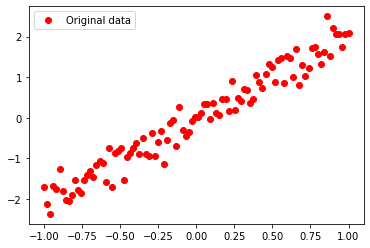

In [3]:
#生成模拟数据
train_X = np.linspace(-1, 1, 100) #输入值，tuple类型, (100, 1)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 #期望输出值，加入噪声
#显示模拟数据点
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [9]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')
z = tf.multiply(X, W) + b #前向结构

通过字典来定义
inputdict = {
    'x': tf.placeholder("float"),
    'y': tf.placeholder("float")
}
# z = tf.multiply(inputdict['x'], W)+ b #字典类型

paradict = {
    'w': tf.Variable(tf.random_normal([1])),
    'b': tf.Variable(tf.zeros([1]))
}
# z = tf.multiply(X, paradict['w'])+ paradict['b']

cost = tf.reduce_mean(tf.square(Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

def moving_average(a, w=10): #接收plotdata["loss"]
    if len(a) < w: #如果误差少于10个
        return a[:] #返回全部误差
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)] 
    #idx是序号，val是值。如果当前误差值的序号<10，直接返回误差值，否则取序号10后面全部的误差值的和，除以10


Epoch: 1 cost= 1.4750923 W= [0.25838494] b= [0.52940667]
Epoch: 3 cost= 0.18625729 W= [1.5891464] b= [0.17241392]
Epoch: 5 cost= 0.083015114 W= [1.9499583] b= [0.03654027]
Epoch: 7 cost= 0.07671323 W= [2.0435336] b= [0.00067465]
Epoch: 9 cost= 0.07647135 W= [2.0677342] b= [-0.00861139]
Epoch: 11 cost= 0.07650168 W= [2.0739915] b= [-0.01101256]
Epoch: 13 cost= 0.07651574 W= [2.0756104] b= [-0.0116338]
Epoch: 15 cost= 0.07651979 W= [2.0760276] b= [-0.01179394]
Epoch: 17 cost= 0.07652087 W= [2.0761368] b= [-0.01183592]
Epoch: 19 cost= 0.07652115 W= [2.0761654] b= [-0.01184684]
 Finished!
cost= 0.0765212 W= [2.0761707] b= [-0.01184873]


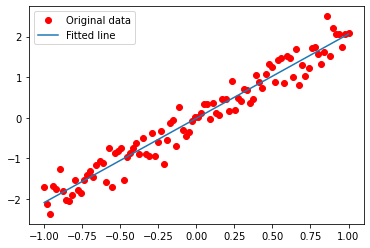

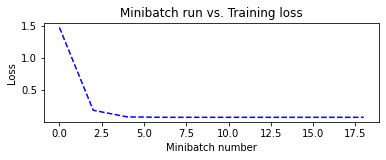

x=0.2，z= [0.4033854]


In [14]:
init = tf.global_variables_initializer()
training_epochs = 20
display_step = 2

with tf.Session() as sess:
    sess.run(init)
    plotdata = {'batchsize':[], 'loss':[]}

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})

        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print ("Epoch:", epoch+1, "cost=", loss,"W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA" ): #如果误差值不够小，就把当前的次数和误差值添加列表
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)

    print (" Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))

    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')  #绘制每次训练对应的误差值
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')     
    plt.show()

    print ("x=0.2，z=", sess.run(z, feed_dict={X: 0.2}))

---